<a href="https://colab.research.google.com/github/kirwarobert/cnn/blob/main/project_inflation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Statement:
Inflation is a critical economic indicator that affects purchasing power, investment decisions, and policy-making worldwide. Over the past decade, global inflation rates have fluctuated due to factors like geopolitical conflicts, supply chain disruptions, and monetary policies. However, analyzing these trends manually is time-consuming and complex. There is a need for an automated, data-driven approach to track inflation patterns across different countries, identify key drivers, and forecast future trends to aid economic decision-making.

# Objective:
The objective of this project is to:

Collect and analyze historical inflation data from multiple countries.

Identify key trends, anomalies, and regional variations in inflation rates.

Visualize inflation patterns using time-series graphs, heatmaps, and comparative charts.

(Optional) Apply machine learning models to predict future inflation trends based on historical data.

Provide actionable insights for policymakers, investors, and economists.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display, HTML
import seaborn as sns

df = pd.read_csv('/content/global_inflation_data.csv')

def plot_inflation_graphs(df, num_graphs):
    # Ensure the number of graphs does not exceed the number of countries in the DataFrame
    num_countries = min(num_graphs, df.shape[0])

    # Setup the subplot grid
    ncols = 2  # Number of columns in the subplot grid
    nrows = int(num_countries / ncols) + (num_countries % ncols > 0)  # Calculate rows needed

    fig, axs = plt.subplots(nrows, ncols, figsize=(15, nrows * 4))
    fig.subplots_adjust(hspace=0.4, wspace=0.4)  # Adjust spacing between plots

    for i in range(num_countries):
        row = i // ncols
        col = i % ncols

        # Select data for the current country
        country_data = df.iloc[i, 2:]  # Exclude country_name and indicator columns
        years = country_data.index.astype(int)

        # Ensure the data is numeric and replace non-numeric values with NaN
        values = pd.to_numeric(country_data.values, errors='coerce')

        # Cap values at 120 for those greater than 100
        modified_values = np.where(values > 100, 120, values)

        # Plotting on the respective subplot
        ax = axs[row, col] if nrows > 1 else axs[col] if nrows == 1 else axs
        ax.plot(years, modified_values, marker='o', linestyle='-')
        ax.set_title(df.iloc[i, 0])
        ax.set_xlabel("Year")
        ax.set_ylabel("Inflation")
        ax.grid(True)
        ax.tick_params(labelrotation=45)

        # Adjust y-ticks to exclude values beyond the cap
        y_ticks = ax.get_yticks()
        y_ticks = y_ticks[y_ticks <= 120]  # Keep y-ticks up to and including the cap
        y_tick_labels = [f"{y:.0f}" if y < 120 else "100+" for y in y_ticks]
        ax.set_yticks(y_ticks)
        ax.set_yticklabels(y_tick_labels)

    # If the number of countries is odd, hide the last subplot if it's unused
    if num_countries % ncols:
        axs[-1, -1].axis('off')

    plt.tight_layout()
    plt.show()


def find_high_inflation_countries(df):
    high_inflation_countries = {}  # Dictionary to store results

    # Exclude non-numeric columns (e.g., country names) from the comparison
    numeric_df = df.select_dtypes(include=[np.number])

    for index, row in numeric_df.iterrows():
        country_name = df.loc[index, 'country_name']  # Get the country name from the original DataFrame
        high_inflation_years = row[row > 100].index.tolist()  # Now, this comparison is safe

        if high_inflation_years:
            # Assuming years are direct column names, adjust if needed
            high_inflation_countries[country_name] = high_inflation_years

    return high_inflation_countries


def display_side_by_side(df, columns):
    # Convert the input data into a DataFrame if it's not already one
    results_df = pd.DataFrame(list(df.items()), columns=columns)

    # Split the DataFrame into two halves
    midpoint = len(results_df) // 2
    left_df = results_df.iloc[:midpoint]
    right_df = results_df.iloc[midpoint:]

    # Convert both halves to HTML
    left_html = left_df.to_html(index=False)
    right_html = right_df.to_html(index=False)

    # Add styling to headers in both halves
    left_html = left_html.replace('<th>', '<th style="font-weight: bold; text-decoration: underline;">')
    right_html = right_html.replace('<th>', '<th style="font-weight: bold; text-decoration: underline;">')

    # Combine the two halves into a single HTML structure, using divs for side-by-side display
    combined_html = f'''
    <div style="display: flex; justify-content: space-between;">
        <div style="width: 49%; margin-right: 1%;">{left_html}</div>
        <div style="width: 49%; margin-left: 1%;">{right_html}</div>
    </div>
    '''

    # Display the combined HTML
    display(HTML(combined_html))

def find_negative_inflation_countries(df):
    negative_inflation_countries = {}  # Dictionary to store results

    # Exclude non-numeric columns (e.g., country names) from the comparison
    numeric_df = df.select_dtypes(include=[np.number])

    for index, row in numeric_df.iterrows():
        country_name = df.loc[index, 'country_name']  # Get the country name from the original DataFrame
        high_inflation_years = row[row < 0].index.tolist()  # Now, this comparison is safe

        if high_inflation_years:
            # Assuming years are direct column names, adjust if needed
            negative_inflation_countries[country_name] = high_inflation_years

    return negative_inflation_countries

def filter_leading_economies_and_plot_correlation(df_copy):
    df_copy.drop('indicator_name', axis=1, inplace=True)
    df_copy.set_index('country_name', inplace=True)
    df_transposed = df_copy.T
    countries = [
        "United States", "China, People's Republic of", "Japan", "Germany", "India",
        "United Kingdom", "France", "Italy", "Canada", "Brazil"
    ]
    df_filtered = df_transposed[countries]
    corr = df_filtered.corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=45)
    plt.title('Correlation Matrix of Top 10 GDP countries')
    plt.show()

In [ ]:
high_inflation_countries = find_high_inflation_countries(df)
display_side_by_side(high_inflation_countries, ['Country', 'Years with Inflation > 100'])

In [ ]:
negative_inflation_countries = find_negative_inflation_countries(df)
display_side_by_side(negative_inflation_countries, ['Country', 'Years with Negative Inflation'])

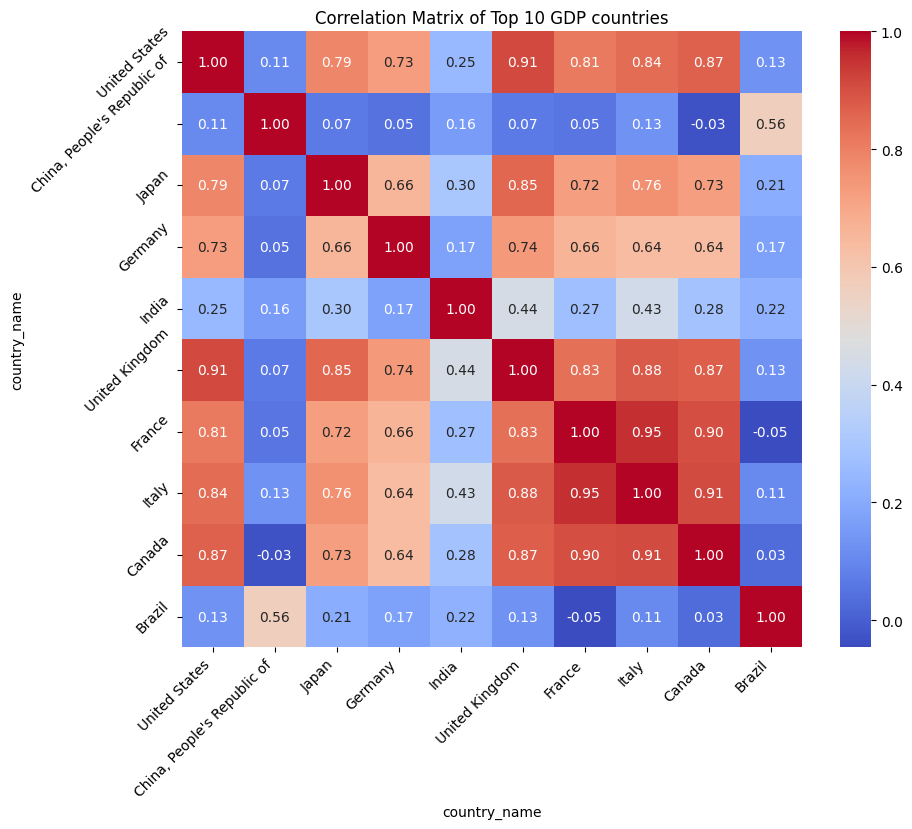

In [ ]:
df_copy = df.copy(deep=True)
filter_leading_economies_and_plot_correlation(df_copy)

In [ ]:
plot_inflation_graphs(df, num_graphs=197)

# Conclusion:
By analyzing global inflation trends, this project helps in understanding how different economies respond to macroeconomic shocks and policy changes. The findings can assist governments in formulating anti-inflation measures, businesses in strategic planning, and individuals in financial decision-making. Future enhancements could include integrating real-time data feeds and expanding the analysis to include causal factors like interest rates and GDP growth.